In [2]:
"""
Spin-Weighted Spherical Harmonics Demonstration in Cosmology
=============================================================

This notebook demonstrates the use of spin‑weighted spherical harmonics in a cosmological context.
We use Healpy to simulate a spin‑2 field—which is analogous to the polarization fields (Q and U)
observed in the Cosmic Microwave Background (CMB).

A spin‑2 field transforms under a rotation by an angle φ as:
    f' = e^(i2φ) f
This means that if you rotate your coordinate system, the field’s phase rotates by twice the rotation angle.

In this example we:
  • Generate a set of random complex alm coefficients for a spin‑2 field.
  • Use Healpy’s alm2map_spin function to produce two maps corresponding to the field’s two components.
  • Plot the maps with a Mollweide projection for a global view.
"""

"\nSpin-Weighted Spherical Harmonics Demonstration in Cosmology\n=============================================================\n\nThis notebook demonstrates the use of spin‑weighted spherical harmonics in a cosmological context.\nWe use Healpy to simulate a spin‑2 field—which is analogous to the polarization fields (Q and U)\nobserved in the Cosmic Microwave Background (CMB).\n\nA spin‑2 field transforms under a rotation by an angle φ as:\n    f' = e^(i2φ) f\nThis means that if you rotate your coordinate system, the field’s phase rotates by twice the rotation angle.\n\nIn this example we:\n  • Generate a set of random complex alm coefficients for a spin‑2 field.\n  • Use Healpy’s alm2map_spin function to produce two maps corresponding to the field’s two components.\n  • Plot the maps with a Mollweide projection for a global view.\n"

In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

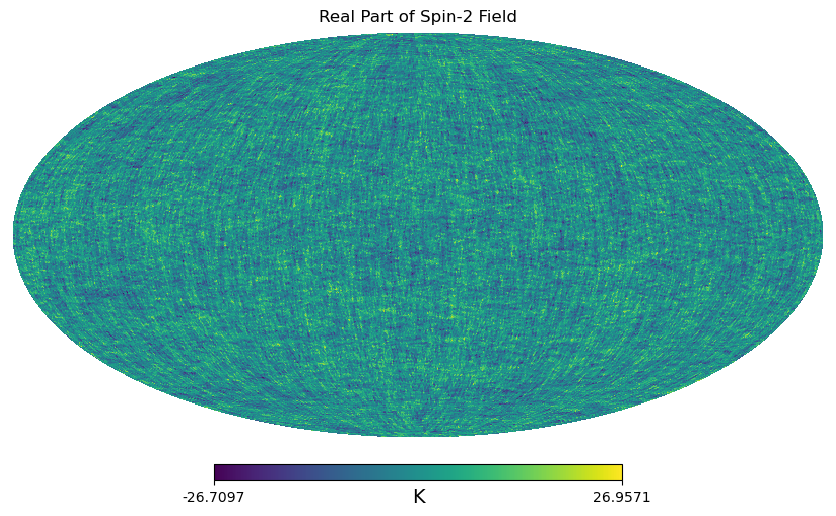

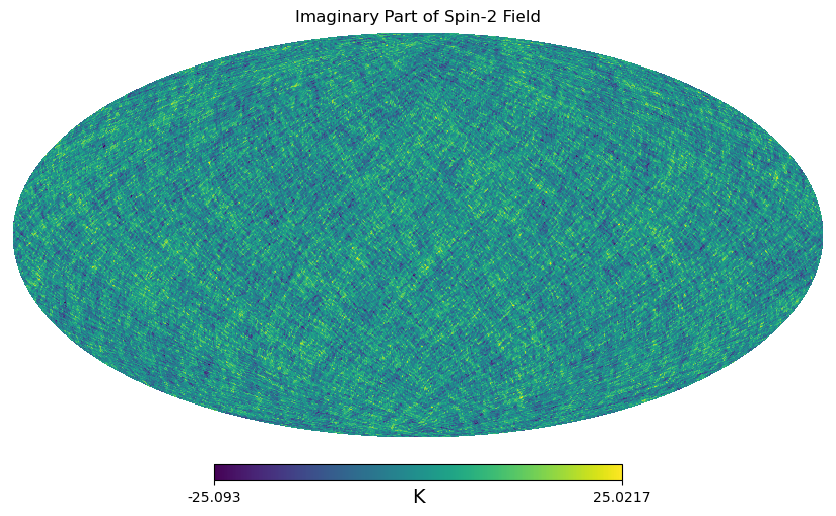

In [5]:
# Set resolution parameters
nside = 128
lmax = 3 * nside - 1

# Create a dummy multipole array (avoid division by zero for ell=0)
ell = np.arange(lmax+1)
# For demonstration we define arbitrary power spectra. In real cases these are computed from theory or data.
cl_TT = np.zeros(lmax+1)          # set temperature power to zero if not needed
cl_EE = 1.0 / (ell + 1)             # a toy EE spectrum (decreases with ell)
cl_BB = 0.1 / (ell + 1)             # a toy BB spectrum (smaller than EE)
cl_TE = np.zeros(lmax+1)            # no T-E correlation here

# (Optional) Set the monopole (ell=0) to zero to avoid any problems.
cl_TT[0] = cl_EE[0] = cl_BB[0] = cl_TE[0] = 0

# Create the list of power spectra
cls = [cl_TT, cl_EE, cl_BB, cl_TE]

# Generate maps. When pol=True, synfast returns (T, Q, U) maps.
T, Q, U = hp.synfast(cls, nside=nside, pol=True, new=True)

# Combine Q and U into the complex spin-2 field
spin2 = Q + 1j * U

# Plot the real and imaginary parts using mollweide projections
hp.mollview(np.real(spin2), title="Real Part of Spin-2 Field", unit="K")
hp.mollview(np.imag(spin2), title="Imaginary Part of Spin-2 Field", unit="K")
plt.show()